In [1]:
# 0 - Pro CAA
# 1 - Against CAA
import numpy as np
import pandas as pd

In [2]:
#load csv file
train_set = pd.read_csv("../input/twitter-sentiment-analysis-dataset/train.csv")
data = train_set
data.head()

,id,label,tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...


In [3]:
test_set = pd.read_csv("../input/twitter-sentiment-analysis-dataset/test.csv")
test_data = test_set
test_data.head()

,id,tweet
0,1.586110e+18,RT @Informaticafan: @ReallySwara @RahulGandhi ...
1,1.584840e+18,RT @MehboobaMufti: Proud moment that UK will h...
2,1.584200e+18,RT @MaktoobMedia: It has been 1078 days since ...
3,1.585300e+18,@mubbusshira @Aryavrat19 @rohitdhavan @Unknown...
4,1.585290e+18,RT @ThePollLady: @AskAnshul And radical mobs i...


In [4]:
data.label.value_counts()

0    285
1    217
Name: label, dtype: int64

In [5]:
data.shape

(502, 3)

In [6]:
data['label'].value_counts()

0    285
1    217
Name: label, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


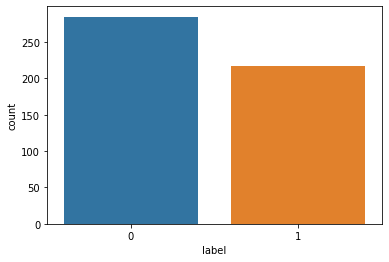

In [7]:
import seaborn as sns
ax=sns.countplot(data.label)

In [8]:
# removing usernames from tweet

data['new_tweet'] = data.tweet.str.replace('@[^\s]+', '')
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,label,tweet,new_tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...,RT Credit where it's due.Inspite of not re...
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...,"RT And radical mobs in India protests CAA, k..."
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...,we r happy for Sunak.\nCAA &amp; NRC is not d...
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...,I dont understand y everyone is suddenly so...
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...,RT Proud moment that UK will have its first I...


In [9]:
# removing usernames from test_data

test_data['new_tweet'] = test_data.tweet.str.replace('@[^\s]+', '')
test_data.head()
ids = test_data['id']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line 

data['new_tweet'] = data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
data['new_tweet'] = data['new_tweet'].str.replace("#", "")
# data['new_tweet'] = data['new_tweet'].str.replace("amp", "and")
data.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,label,tweet,new_tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...,RT Credit where it s due Inspite of not re...
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...,RT And radical mobs in India protests CAA k...
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...,we r happy for Sunak CAA amp NRC is not di...
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...,I dont understand y everyone is suddenly so...
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...,RT Proud moment that UK will have its first I...


In [11]:
test_data['new_tweet'] = test_data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
test_data['new_tweet'] = test_data['new_tweet'].str.replace("#", "")
test_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,tweet,new_tweet
0,1.586110e+18,RT @Informaticafan: @ReallySwara @RahulGandhi ...,RT Credit where it s due Inspite of not re...
1,1.584840e+18,RT @MehboobaMufti: Proud moment that UK will h...,RT Proud moment that UK will have its first I...
2,1.584200e+18,RT @MaktoobMedia: It has been 1078 days since ...,RT It has been days since the movement a...
3,1.585300e+18,@mubbusshira @Aryavrat19 @rohitdhavan @Unknown...,Just as Israel is the land and safe have...
4,1.585290e+18,RT @ThePollLady: @AskAnshul And radical mobs i...,RT And radical mobs in India protests CAA k...


In [12]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(data['new_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a=Counter(all_words).most_common(10)
a

[('india', 495),
 ('in', 393),
 ('caa', 353),
 ('of', 348),
 ('the', 341),
 ('rt', 337),
 ('is', 259),
 ('that', 220),
 ('it', 213),
 ('to', 178)]

In [13]:
#tokenization
data['new_tweet'] = data['new_tweet'].apply(lambda x: x.split())
data.head()

,id,label,tweet,new_tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...,"[RT, Credit, where, it, s, due, Inspite, of, n..."
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...,"[RT, And, radical, mobs, in, India, protests, ..."
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...,"[we, r, happy, for, Sunak, CAA, amp, NRC, is, ..."
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...,"[I, dont, understand, y, everyone, is, suddenl..."
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...,"[RT, Proud, moment, that, UK, will, have, its,..."


In [14]:
test_data['new_tweet'] = test_data['new_tweet'].apply(lambda x: x.split())
test_data.head()

,id,tweet,new_tweet
0,1.586110e+18,RT @Informaticafan: @ReallySwara @RahulGandhi ...,"[RT, Credit, where, it, s, due, Inspite, of, n..."
1,1.584840e+18,RT @MehboobaMufti: Proud moment that UK will h...,"[RT, Proud, moment, that, UK, will, have, its,..."
2,1.584200e+18,RT @MaktoobMedia: It has been 1078 days since ...,"[RT, It, has, been, days, since, the, movement..."
3,1.585300e+18,@mubbusshira @Aryavrat19 @rohitdhavan @Unknown...,"[Just, as, Israel, is, the, land, and, safe, h..."
4,1.585290e+18,RT @ThePollLady: @AskAnshul And radical mobs i...,"[RT, And, radical, mobs, in, India, protests, ..."


In [15]:
#stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

data['new_tweet']= data['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,id,label,tweet,new_tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...,"[RT, credit, where, it, s, due, inspit, of, no..."
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...,"[RT, and, radic, mob, in, india, protest, caa,..."
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...,"[we, r, happi, for, sunak, caa, amp, nrc, is, ..."
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...,"[I, dont, understand, y, everyon, is, suddenli..."
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...,"[RT, proud, moment, that, UK, will, have, it, ..."


In [16]:
test_data['new_tweet']= test_data['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
test_data.head()

,id,tweet,new_tweet
0,1.586110e+18,RT @Informaticafan: @ReallySwara @RahulGandhi ...,"[RT, credit, where, it, s, due, inspit, of, no..."
1,1.584840e+18,RT @MehboobaMufti: Proud moment that UK will h...,"[RT, proud, moment, that, UK, will, have, it, ..."
2,1.584200e+18,RT @MaktoobMedia: It has been 1078 days since ...,"[RT, It, ha, been, day, sinc, the, movement, a..."
3,1.585300e+18,@mubbusshira @Aryavrat19 @rohitdhavan @Unknown...,"[just, as, israel, is, the, land, and, safe, h..."
4,1.585290e+18,RT @ThePollLady: @AskAnshul And radical mobs i...,"[RT, and, radic, mob, in, india, protest, caa,..."


In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

#stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')

In [19]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)


In [20]:
import string 

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
    

In [21]:
data['new_tweet'] = data['new_tweet'].apply(process) 
data.head()

,id,label,tweet,new_tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...,"[rt, read, draft, due, caa, credit, nrc, inspit]"
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...,"[rt, protest, like, mob, well, india, pakistan..."
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...,"[given, minor, india, nrc, result, goi, happi,..."
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...,"[suddenli, india, racist, toolkit, extrem, eve..."
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...,"[india, first, rt, indian, rightli, origin, pr..."


In [22]:
# test_data
test_data['new_tweet'] = test_data['new_tweet'].apply(process) 
test_data.head()

,id,tweet,new_tweet
0,1.586110e+18,RT @Informaticafan: @ReallySwara @RahulGandhi ...,"[rt, read, draft, due, caa, credit, nrc, inspit]"
1,1.584840e+18,RT @MehboobaMufti: Proud moment that UK will h...,"[india, first, rt, indian, rightli, origin, pr..."
2,1.584200e+18,RT @MaktoobMedia: It has been 1078 days since ...,"[rt, sinc, movement, ha, began, india, sharjee..."
3,1.585300e+18,@mubbusshira @Aryavrat19 @rohitdhavan @Unknown...,"[india, buddhist, sikh, worldwid, israel, indi..."
4,1.585290e+18,RT @ThePollLady: @AskAnshul And radical mobs i...,"[rt, protest, like, mob, well, india, pakistan..."


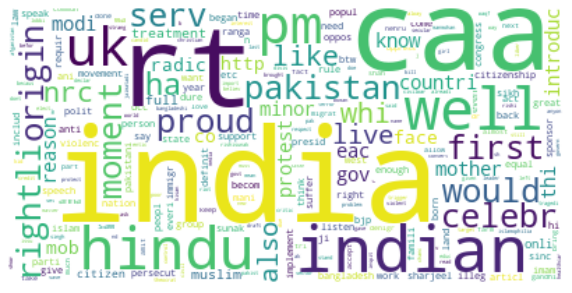

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# split sentences to get individual words
words = []
for line in data['new_tweet']: 
    words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
data['new_tweet'] = data['new_tweet'].apply(string)
data.head()  

,id,label,tweet,new_tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...,rt read draft due caa credit nrc inspit
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...,rt protest like mob well india pakistan face r...
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...,given minor india nrc result goi happi underta...
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...,suddenli india racist toolkit extrem everyon p...
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...,india first rt indian rightli origin proud pm ...


In [25]:
test_data['new_tweet'] = test_data['new_tweet'].apply(string)
test_data.head()

,id,tweet,new_tweet
0,1.586110e+18,RT @Informaticafan: @ReallySwara @RahulGandhi ...,rt read draft due caa credit nrc inspit
1,1.584840e+18,RT @MehboobaMufti: Proud moment that UK will h...,india first rt indian rightli origin proud pm ...
2,1.584200e+18,RT @MaktoobMedia: It has been 1078 days since ...,rt sinc movement ha began india sharjeel imam caa
3,1.585300e+18,@mubbusshira @Aryavrat19 @rohitdhavan @Unknown...,india buddhist sikh worldwid israel indian off...
4,1.585290e+18,RT @ThePollLady: @AskAnshul And radical mobs i...,rt protest like mob well india pakistan face r...


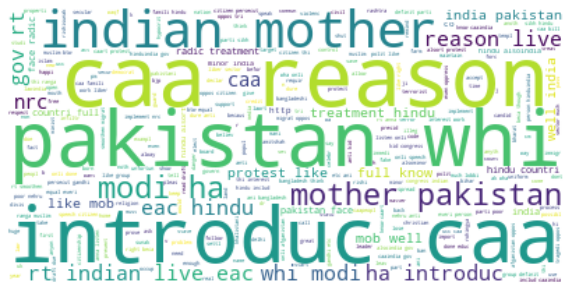

In [26]:
positive = [r for r in data['new_tweet'][data['label']==0]]
pos = ''.join(positive)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

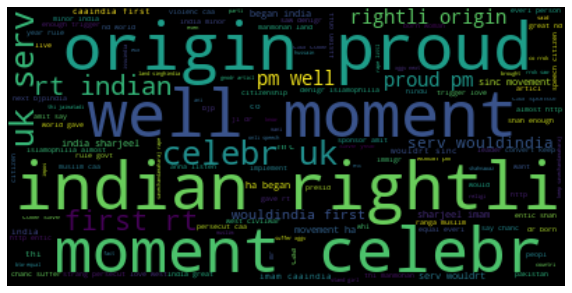

In [27]:
negative = [r for r in data['new_tweet'][data['label']==1]]
neg = ''.join(negative)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Bag of words 

In [28]:
data.drop(["id","tweet" ],axis=1,inplace=True)
data.head()

,label,new_tweet
0,0,rt read draft due caa credit nrc inspit
1,0,rt protest like mob well india pakistan face r...
2,0,given minor india nrc result goi happi underta...
3,0,suddenli india racist toolkit extrem everyon p...
4,1,india first rt indian rightli origin proud pm ...


In [29]:
test_data.drop(["id","tweet" ],axis=1,inplace=True)
test_data.head()

,new_tweet
0,rt read draft due caa credit nrc inspit
1,india first rt indian rightli origin proud pm ...
2,rt sinc movement ha began india sharjeel imam caa
3,india buddhist sikh worldwid israel indian off...
4,rt protest like mob well india pakistan face r...


In [30]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data["new_tweet"], 
                                                    data["label"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (401,) (401,)
testing set : (101,) (101,)


In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)


In [32]:
test_x = test_data['new_tweet']
test_x

0                rt read draft due caa credit nrc inspit
1      india first rt indian rightli origin proud pm ...
2      rt sinc movement ha began india sharjeel imam caa
3      india buddhist sikh worldwid israel indian off...
4      rt protest like mob well india pakistan face r...
                             ...                        
122    india gov rt indian mother pakistan whi modi h...
123    hoga mention chang thi india good nrc time ind...
124    india citizenship irrelev indian sunak smart r...
125    still becom need india dec sikh give allow ind...
126    condit major discours india andolan improv kis...
Name: new_tweet, Length: 127, dtype: object

In [33]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(401, 1131)
(401, 1131)


In [34]:
test_x_counts = count_vect.transform(test_x)
test_x_tfidf = transformer.transform(test_x_counts)

print(test_x_counts.shape)
print(test_x_tfidf.shape)

(127, 1131)
(127, 1131)


In [35]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(101, 1131)
(101, 1131)


### Model building

#### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [37]:
predictions = model.predict(x_test_tfidf)

In [38]:
submission  = model.predict(test_x_tfidf)

In [39]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

91.0891089108911

In [40]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[60,  0],
       [ 9, 32]])

In [41]:
#f1-score
f1_score(y_test,predictions)

0.8767123287671234

In [42]:
from __future__ import print_function


# Special END separator
END = '0e8ed89a-47ba-4cdb-938e-b8af8e084d5c'

# Text attributes
ALL_OFF = '\033[0m'
BOLD = '\033[1m'
UNDERSCORE = '\033[4m'
BLINK = '\033[5m'
REVERSE = '\033[7m'
CONCEALED = '\033[7m'

# Foreground colors
FG_BLACK = '\033[30m'
FG_RED = '\033[31m'
FG_GREEN = '\033[32m'
FG_YELLOW = '\033[33m'
FG_BLUE = '\033[34m'
FG_MAGENTA = '\033[35m'
FG_CYAN = '\033[36m'
FG_WHITE = '\033[37m'

# Background colors
BG_BLACK = '\033[40m'
BG_RED = '\033[41m'
BG_GREEN = '\033[42m'
BG_YELLOW = '\033[43m'
BG_BLUE = '\033[44m'
BG_MAGENTA = '\033[45m'
BG_CYAN = '\033[46m'
BG_WHITE = '\033[47m'


class pretty_output():
    '''
    Context manager for pretty terminal prints
    '''

    def __init__(self, *attr):
        self.attributes = attr

    def __enter__(self):
        return self

    def __exit__(self, type, value, traceback):
        pass

    def write(self, msg):
        style = ''.join(self.attributes)
        print('{}{}{}'.format(style, msg.replace(END, ALL_OFF + style), ALL_OFF))


if __name__ == '__main__':

    with pretty_output(FG_RED) as out:
        out.write('This is a test in RED')

    with pretty_output(FG_BLUE) as out:
        out.write('This is a test in BLUE')

    with pretty_output(BOLD, FG_GREEN) as out:
        out.write('This is a bold text in green')

    with pretty_output(BOLD, BG_GREEN) as out:
        out.write('This is a text with green background')

    with pretty_output(FG_GREEN) as out:
        out.write('This is a green text with ' + BOLD + 'bold' + END + ' text included')

    with pretty_output() as out:
        out.write(BOLD + 'Use this' + END + ' even with ' + BOLD + FG_RED + 'no parameters' + END + ' in the with statement')

This is a test in RED
This is a test in BLUE
This is a bold text in green
This is a text with green background
This is a green text with bold text included
Use this even with no parameters in the with statement


In [43]:
from sklearn.metrics import classification_report
df = pd.DataFrame(classification_report(predictions, 
                                        y_test, digits=2,
                                        output_dict=True)).T

with pretty_output(BOLD, FG_GREEN) as out:
    out.write('                 RANDOM FOREST                 ')
df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'1', :'f1-score'],)


                 RANDOM FOREST                 


,precision,recall,f1-score,support
0,1.000000,0.869565,0.930233,69.000000
1,0.780488,1.000000,0.876712,32.000000
accuracy,0.910891,0.910891,0.910891,0.910891
macro avg,0.890244,0.934783,0.903472,101.000000
weighted avg,0.930452,0.910891,0.913276,101.000000


In [44]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val == 'NEG' else 'green'
    return 'color: %s' % color

In [45]:
tweets = pd.DataFrame(columns=['Tweets','Prediction','Label'])
tweets['Tweets'] = x_test
tweets['Prediction'] = predictions
tweets['Label'] = y_test
tweets.replace([0,1],['POS', 'NEG'], inplace=True)
with pretty_output(BOLD, FG_GREEN) as out:
    out.write('                 RANDOM FOREST Tweets Prediction                ')
(tweets.sample(10).style.applymap(color_negative_red, subset=['Prediction', 'Label']))

                 RANDOM FOREST Tweets Prediction                


,Tweets,Prediction,Label
131,rt give n minor persecut citizenship caa,POS,POS
278,riot india matter keep nrc alway rt shut mouth delhi hi caa b,POS,POS
496,rt protest like mob well india pakistan face radic treatment hindu countri full know caa,POS,POS
222,rt protest like mob well india pakistan face radic treatment hindu countri full know caa,POS,POS
317,india first rt indian rightli origin proud pm well moment celebr uk serv would,NEG,NEG
227,india first rt indian rightli origin proud pm well moment celebr uk serv would,NEG,NEG
304,india first rt indian rightli origin proud pm well moment celebr uk serv would,NEG,NEG
225,india first rt indian rightli origin proud pm well moment celebr uk serv would,NEG,NEG
68,pakist minor india great nd world gave rt ji dr born woman pm thi manmohan land singh,NEG,NEG
289,anti india miscreant outfit ban nrc need ucc caa,POS,POS


In [46]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [47]:
test_data.head()

,new_tweet
0,rt read draft due caa credit nrc inspit
1,india first rt indian rightli origin proud pm ...
2,rt sinc movement ha began india sharjeel imam caa
3,india buddhist sikh worldwid israel indian off...
4,rt protest like mob well india pakistan face r...


In [48]:
submission_df = pd.DataFrame(columns=['id', 'label'])
submission_df['id'] = ids
submission_df['label'] = submission
submission_df.head(5)

,id,label
0,1.586110e+18,0
1,1.584840e+18,1
2,1.584200e+18,1
3,1.585300e+18,0
4,1.585290e+18,0


In [49]:
submission_df.to_csv('submission.csv',index=False)

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=400 )
logmodel.fit(x_train_tfidf,y_train)

LogisticRegression(random_state=400)

In [51]:
log_predictions = logmodel.predict(x_test_tfidf)

In [52]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,log_predictions)

array([[60,  0],
       [10, 31]])

In [53]:
f1_score(y_test,log_predictions)

0.8611111111111112

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_predictions)*100

90.0990099009901

In [55]:
submission  = model.predict(test_x_tfidf)
submission_df = pd.DataFrame(columns=['id', 'label'])
submission_df['id'] = ids
submission_df['label'] = submission
submission_df.to_csv('submission-log.csv',index=False)
submission_df.head(5)

,id,label
0,1.586110e+18,0
1,1.584840e+18,1
2,1.584200e+18,1
3,1.585300e+18,0
4,1.585290e+18,0


### Gradient Boosting Regressor

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

alg= GradientBoostingRegressor(n_estimators= 550, learning_rate= 0.1, max_depth= 3)
alg.fit(x_train_tfidf,y_train)

GradientBoostingRegressor(n_estimators=550)

In [57]:
alg_predictions = logmodel.predict(x_test_tfidf)

In [58]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,alg_predictions)

array([[60,  0],
       [10, 31]])

In [59]:
f1_score(y_test,alg_predictions)

0.8611111111111112

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,alg_predictions)*100

90.0990099009901

In [61]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


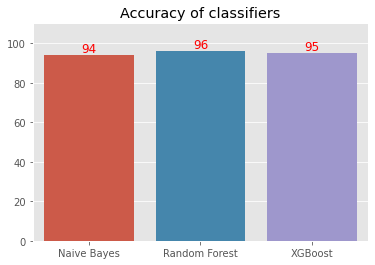

In [62]:
models = ["Naive Bayes", 'Random Forest', 'XGBoost']
acc = [94, 96, 95]
plt.style.use('ggplot')
plt.figure(figsize=(6, 4))
sns.barplot(models, acc, );
# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = 110 
ax.set_ylim([0, y_max])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.title('Accuracy of classifiers')
plt.show()

In [63]:
submission  = model.predict(test_x_tfidf)
submission_df = pd.DataFrame(columns=['id', 'label'])
submission_df['id'] = ids
submission_df['label'] = submission
submission_df.to_csv('submission_gb.csv',index=False)
submission_df.head(5)

,id,label
0,1.586110e+18,0
1,1.584840e+18,1
2,1.584200e+18,1
3,1.585300e+18,0
4,1.585290e+18,0
